# #클러스터링 #군집분석 #군집라벨링

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns',30) # 이거 하면 테두리 회색 된다.

In [21]:
ver5 = pd.read_csv('./real_fin_dataset(ver.5)(24.04.18).csv')  # 5가 스케일링 된 버전이다. 옳은 버전이다.
ver5

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,...,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
1,-0.041896,-0.396350,-0.847594,-0.533882,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
2,-0.041896,-0.396350,-0.847594,-0.759452,-2.159026,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,0
3,-0.041896,-0.396350,-0.847594,-0.759452,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
4,-0.041896,-0.396350,-0.847594,-0.533882,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,6.056361,5.329635,0.098728,-0.099825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15223,0.266992,-0.527222,0.507074,1.496245,3.017945,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,-0.099825,1
15224,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,2.684018,0.098728,-0.099825,1
15225,0.266992,-0.527222,0.507074,0.368397,-0.433369,-0.025662,0.0,-0.012654,-0.031452,-0.03713,...,-0.038568,-0.071848,-0.045946,-0.04438,-0.063968,-0.213455,0.038401,0.098728,10.159622,1


In [ ]:
# 우선적으로 고려해 볼 상관관계가 높은 컬럼들
clean_store & restroom_clean (0.38)
plenty_seats & spacious_store (0.39)
plenty_seats & comfortable_seats (0.36)
sentiment & bread (0.31)

# 데이터 편향이 너무 큰 컬럼은 삭제한다.
노시니어, 노키즈, 주차여부, 건강여부 등

# 데이터 수집이 안된 컬럼은 삭제한다.

In [22]:
X = ver5.copy() # 테스트 컬럼
X = X.drop('Review_score', axis=1) # 특별메뉴 삭제했을 때랑 같다.
X = X.drop('Review_counts', axis=1) # 있어도 없어도 결과가 같다.
X = X.drop('slope', axis=1) # 있어도 없어도 결과가 같다.
# X = X.drop('bread', axis=1)
# X = X.drop('beverage', axis=1)
X = X.drop('vegan', axis=1) # 있어도 없어도 결과가 같다.
X = X.drop('no_senior', axis=1) # 데이터가 별로 없는 거 삭제 중 1
X = X.drop('no_kids', axis=1) # 데이터가 별로 없는 거 삭제 중 2
X = X.drop('pet', axis=1) # 데이터가 별로 없는 거 삭제 중 3 
X = X.drop('whole_wheat', axis=1) # 데이터가 별로 없는 거 삭제 중 4
# X = X.drop('view', axis=1)
# X = X.drop('atmosphere', axis=1)
# X = X.drop('friendly', axis=1)
# X = X.drop('clean_store', axis=1)
X = X.drop('restroom_clean', axis=1) # 청결 매장, 화장실이 중복될 수 있다. 1
X = X.drop('parking', axis=1) # 있없 같다.
# X = X.drop('spacious_store', axis=1) # 사각형인데 빨간색이 섞인다.
X = X.drop('plenty_seats', axis=1) # 좌석 많음이 [가게 넓음, 좌석 편안]과 중복될 수 있다. 2
# X = X.drop('comfortable_seats', axis=1) # 살짝 내려와서 섞인다.
X = X.drop('special_menu', axis=1) # 평점 삭제했을 때랑 같다.
X = X.drop('photo', axis=1) # 있없 같다.
X = X.drop('good_music', axis=1) # 있없 같다.
X = X.drop('reservation_possible', axis=1) # 있없 같다.
X = X.drop('unique_concept', axis=1) # 있없 같다.
# X = X.drop('beautiful_interior', axis=1) # 있없 같다!?
# X = X.drop('price', axis=1) # 살짝 내려와서 섞인다. 이거말고 있었는데
X = X.drop('wait', axis=1) # 있없 같다.
X = X.drop('health', axis=1) # 있없 같다.
X = X.drop('sentiment', axis=1) # 빵맛과 중복될 수 있다. 3

In [23]:
# 4개의 특성을 가지고 있어 시각화 하기 어려움이 존재, PCA를 통해 2개의 특성으로 차원을 축소
from sklearn.decomposition import PCA
P = PCA(n_components=2, random_state=0)  # PCA는 수학적으로 직교 선형 변환으로 정의된다. 직교 선형 변환이란 어떤 데이터를 새로운 좌표계로 변환하는 것을 말한다. 
X_PCA = P.fit_transform(X) # 난수 추가
X.shape, X_PCA.shape

((15227, 10), (15227, 2))

In [24]:
# KMeans 모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0) # 0이 아니어도 된다.

In [25]:
# 모델 학습
model.fit(X_PCA)

KMeans(n_clusters=6, random_state=0)

In [26]:
# 군집의 중심점 확인
model.cluster_centers_

array([[-0.52124127,  0.20232672],
       [ 0.16179067, -1.10762402],
       [ 2.66754365,  3.48962988],
       [ 1.39916761,  1.00545127],
       [-3.29701261,  1.95170132],
       [ 4.9998533 , -0.7363759 ]])

In [8]:
# fit 과정에서 사용된 데이터의 군집 결과 확인 = model.predict(X_PCA)
model.labels_

array([0, 0, 0, ..., 1, 0, 1])

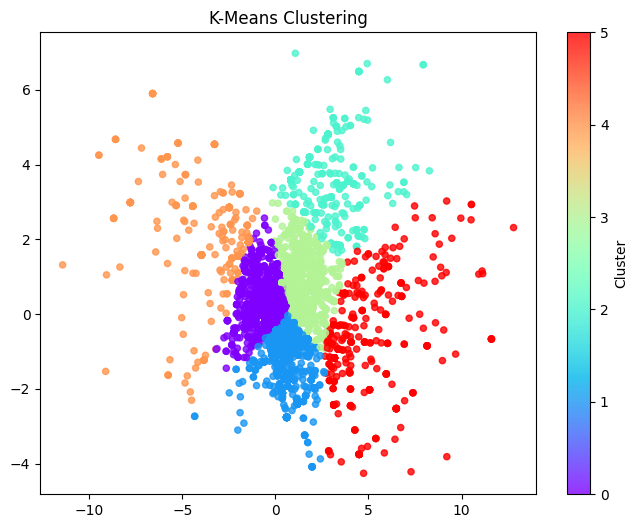

In [9]:
# 예측된 군집
kmeans = model.labels_
# 군집의 중심점
centers = model.cluster_centers_

# 그래프 그리기
plt.figure(figsize=(8, 6))
# 각 클러스터를 무지개색으로 표시
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=kmeans, cmap='rainbow', s=20, alpha=0.8)
# 클러스터 중심점 표시
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5, marker='X')

plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(False)
plt.show()

# 영선 튜터님 기본 코드
# plt.scatter(X_PCA[:,0], X_PCA[:,1], c=model.labels_)

In [36]:
# X변수 대상의 KMeans 모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0) # 0이 아니어도 된다.
model.fit(X) # 축소하지 않은 데이터 학습, 축소시 데이터 손실.

KMeans(n_clusters=6, random_state=0)

In [37]:
# 중심점 확인
model.cluster_centers_

array([[-5.45749805e-01, -4.84614965e-01, -1.54724114e-01,
        -2.56392440e-01, -1.88949810e-01, -1.48073540e-01,
        -1.79752830e-01, -9.20755650e-02, -2.12672216e-01,
        -1.28639872e-01],
       [ 1.35789419e+00, -3.96793037e-01, -1.58219536e-01,
        -2.60389690e-01,  2.57273996e-01,  3.87773731e-02,
        -1.69127166e-01, -5.43945774e-02, -2.13997685e-01,
         1.90277741e-01],
       [-1.11588355e-01,  3.95661920e-01,  2.48065502e+00,
         2.72603704e+00,  3.44373179e-01,  2.84132103e-01,
        -1.17534181e-01, -2.46397116e-03, -2.05927073e-02,
         6.21751234e-02],
       [-2.52179817e-01,  1.75391021e+00, -1.60142531e-01,
        -1.02873531e-01,  8.50082131e-04,  2.09742859e-02,
        -1.85770668e-01, -5.07433148e-02, -2.09774136e-01,
         9.12025577e-02],
       [ 9.56869845e-03,  2.43154334e-01, -5.56334737e-02,
         4.17946396e-01,  1.93380435e-01,  7.24107697e-01,
         3.82489513e+00,  1.60205525e+00, -7.78862191e-03,
         2.

In [38]:
# 군집 라벨 확인
model.labels_

array([0, 3, 0, ..., 1, 0, 0])

In [39]:
from collections import Counter

# 군집 라벨 카운팅, 정렬 코드
label_counts = Counter(model.labels_)
sorted_label_counts = dict(sorted(label_counts.items()))
sorted_label_counts

{0: 7213, 1: 3463, 2: 868, 3: 2385, 4: 628, 5: 670}

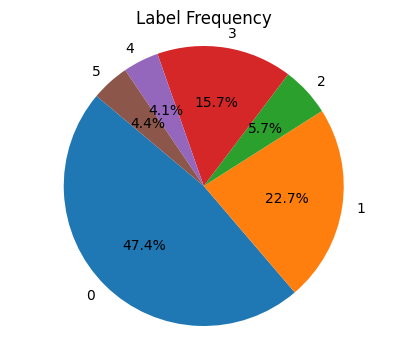

In [14]:
# 파이차트를 그리기 위한 레이블과 빈도수 리스트 추출
labels = list(sorted_label_counts.keys())
sizes = list(sorted_label_counts.values())

# 파이차트 그리기
plt.figure(figsize=(5, 4))  # 파이차트의 크기 설정
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원형 파이차트를 위한 설정
plt.title('Label Frequency')  # 파이차트 제목 설정
plt.show()  # 파이차트 보여주기

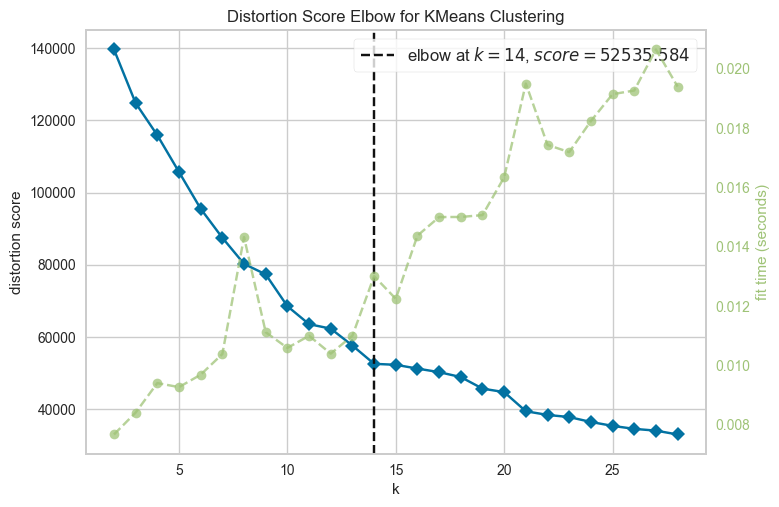

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=28, random_state=0), k=(2, 29))

In [15]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=0), X, k=(2,29))

In [16]:
from sklearn.metrics import silhouette_score, silhouette_samples
for num in range(2, 11):
    kmeans = KMeans(n_clusters=num, random_state=0).fit(X)
    silhouette_avg = silhouette_score(ver5, kmeans.labels_)
    print(f'클러스터의 수: {num}, 실루엣 계수: {silhouette_avg:.6f}')

클러스터의 수: 2, 실루엣 계수: 0.113134
클러스터의 수: 3, 실루엣 계수: 0.095676
클러스터의 수: 4, 실루엣 계수: 0.098069
클러스터의 수: 5, 실루엣 계수: 0.099498
클러스터의 수: 6, 실루엣 계수: 0.103383
클러스터의 수: 7, 실루엣 계수: 0.109025
클러스터의 수: 8, 실루엣 계수: 0.107614
클러스터의 수: 9, 실루엣 계수: 0.101578
클러스터의 수: 10, 실루엣 계수: 0.114453


# DBSCAN

In [17]:
# DBSCAN 모델 생성
from sklearn.cluster import DBSCAN
model = DBSCAN()

In [18]:
# 모델 학습
model.fit(X_PCA)

DBSCAN()

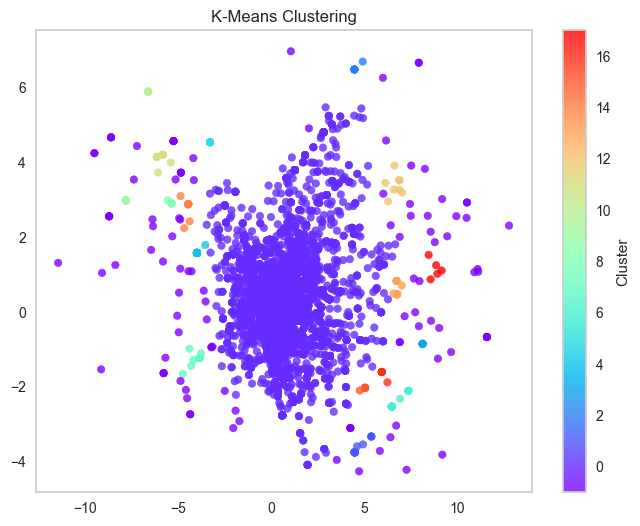

In [19]:
# 예측된 군집
kmeans = model.labels_
# 군집의 중심점
# centers = model.cluster_centers_

# 그래프 그리기
plt.figure(figsize=(8, 6))
# 각 클러스터를 무지개색으로 표시
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=kmeans, cmap='rainbow', s=30, alpha=0.8)
# 클러스터 중심점 표시
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5, marker='X')

plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(False)
plt.show()

# 이너샤

In [27]:
# 이너샤 조회
model.inertia_

12119.434525175284

In [28]:
import warnings 
warnings.filterwarnings("ignore")

In [29]:
# 이너샤를 이용해 최적의 k값 찾기
# KMeans 모델 생성
ks = range(1, 20)
inertias = list()
for k in ks:
    model = KMeans(n_clusters=k) # 군집은 k개로 형성
    model.fit(X)
    inertias.append(model.inertia_)
    print (f'n_cluster :{k}, inertia: {model.inertia_}')

n_cluster :1, inertia: 152270.00000000282
n_cluster :2, inertia: 139507.93873757622
n_cluster :3, inertia: 133319.8995797449
n_cluster :4, inertia: 112843.92329924807
n_cluster :5, inertia: 104437.56304875037
n_cluster :6, inertia: 95190.56513180857
n_cluster :7, inertia: 93395.33732535431
n_cluster :8, inertia: 87838.50238582153
n_cluster :9, inertia: 73870.50938045233
n_cluster :10, inertia: 72808.34859962744
n_cluster :11, inertia: 65278.412750295654
n_cluster :12, inertia: 60165.15621502408
n_cluster :13, inertia: 56791.872774936244
n_cluster :14, inertia: 49886.67766996524
n_cluster :15, inertia: 47702.575385034506
n_cluster :16, inertia: 46129.74673581098
n_cluster :17, inertia: 45399.405716685775
n_cluster :18, inertia: 44678.42258724619
n_cluster :19, inertia: 41904.95586536581


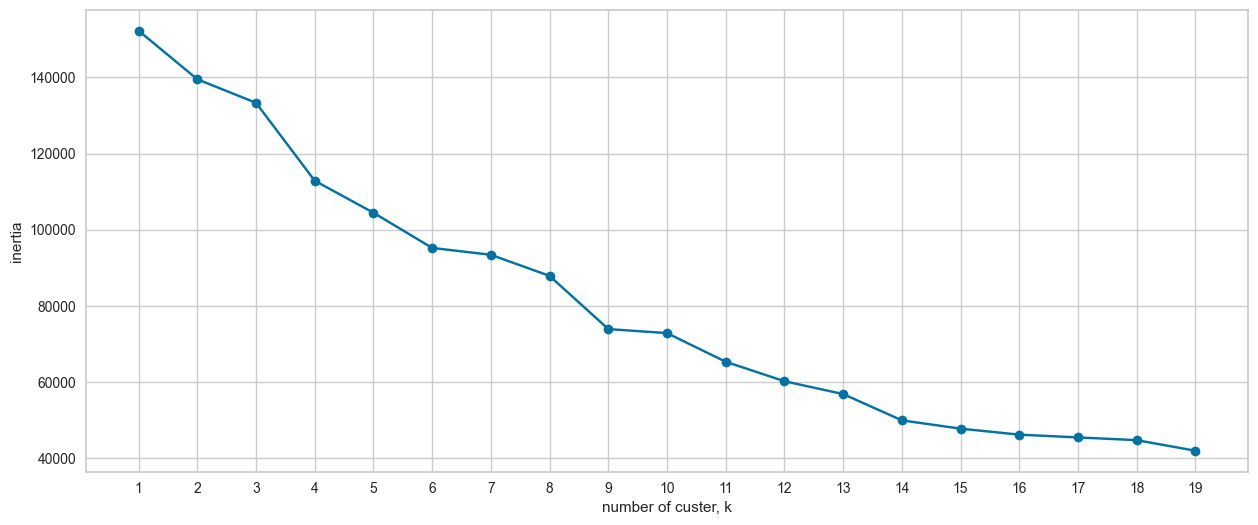

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of custer, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# 군집별 라인그래프 확인

In [40]:
# X변수 복제
Y = X.copy()

In [41]:
Y['Group'] = model.labels_
Y.head(3)

,bread,beverage,view,atmosphere,friendly,clean_store,spacious_store,comfortable_seats,beautiful_interior,price,Group
0,-0.759452,-0.433369,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401,0
1,-0.533882,3.017945,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401,3
2,-0.759452,-2.159026,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401,0


In [42]:
Y.dtypes

bread                 float64
beverage              float64
view                  float64
atmosphere            float64
friendly              float64
clean_store           float64
spacious_store        float64
comfortable_seats     float64
beautiful_interior    float64
price                 float64
Group                   int32
dtype: object

In [43]:
# 군집 번호 별로 각 컬럼의 평균 계산
cluster_means = Y.groupby('Group').mean()
cluster_means

,bread,beverage,view,atmosphere,friendly,clean_store,spacious_store,comfortable_seats,beautiful_interior,price
Group,,,,,,,,,,
0,-0.545750,-0.484615,-0.154724,-0.256392,-0.188950,-0.148074,-0.179753,-0.092076,-0.212672,-0.128640
1,1.357894,-0.396793,-0.158220,-0.260390,0.257274,0.038777,-0.169127,-0.054395,-0.213998,0.190278
2,-0.111588,0.395662,2.480655,2.726037,0.344373,0.284132,-0.117534,-0.002464,-0.020593,0.062175
3,-0.252180,1.753910,-0.160143,-0.102874,0.000850,0.020974,-0.185771,-0.050743,-0.209774,0.091203
4,0.009569,0.243154,-0.055633,0.417946,0.193380,0.724108,3.824895,1.602055,-0.007789,0.024078
5,-0.109844,0.284195,-0.108047,0.548912,0.073983,0.272207,0.037751,-0.045403,4.176352,-0.026357


In [44]:
# 군집 번호 별로 각 컬럼의 중간값 계산
cluster_means = Y.groupby('Group').median()
cluster_means

,bread,beverage,view,atmosphere,friendly,clean_store,spacious_store,comfortable_seats,beautiful_interior,price
Group,,,,,,,,,,
0,-0.759452,-0.433369,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401
1,1.496245,-0.433369,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401
2,-0.759452,-0.433369,-0.157371,3.961130,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401
3,-0.759452,1.292288,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,-0.213455,0.038401
4,-0.759452,-0.433369,-0.157371,-0.279616,-0.186627,-0.081248,3.080063,-0.053459,-0.213455,0.038401
5,-0.759452,-0.433369,-0.157371,-0.279616,-0.186627,-0.081248,-0.150284,-0.053459,2.921453,0.038401


In [45]:
# 군집 번호 별로 각 컬럼의 합계 계산: 가능한 이유 같은 기준으로 측정된 값이기 때문에
cluster_means = Y.groupby('Group').sum()
cluster_means

,bread,beverage,view,atmosphere,friendly,clean_store,spacious_store,comfortable_seats,beautiful_interior,price
Group,,,,,,,,,,
0,-3936.493347,-3495.527745,-1116.025036,-1849.358666,-1362.894980,-1068.054447,-1296.557164,-664.141050,-1534.004693,-927.879396
1,4702.387569,-1374.094288,-547.914254,-901.729498,890.939848,134.286043,-585.687377,-188.368422,-741.073983,658.931816
2,-96.858692,343.434547,2153.208558,2366.200148,298.915919,246.626665,-102.019669,-2.138727,-17.874470,53.968007
3,-601.448863,4183.075858,-381.939937,-245.353371,2.027446,50.023672,-443.063043,-121.022806,-500.311314,217.518100
4,6.009143,152.700922,-34.937821,262.470337,121.442913,454.739634,2402.034143,1006.090700,-4.891255,15.120822
5,-73.595809,190.410706,-72.391509,367.771051,49.568854,182.378433,25.293111,-30.419695,2798.155714,-17.659350


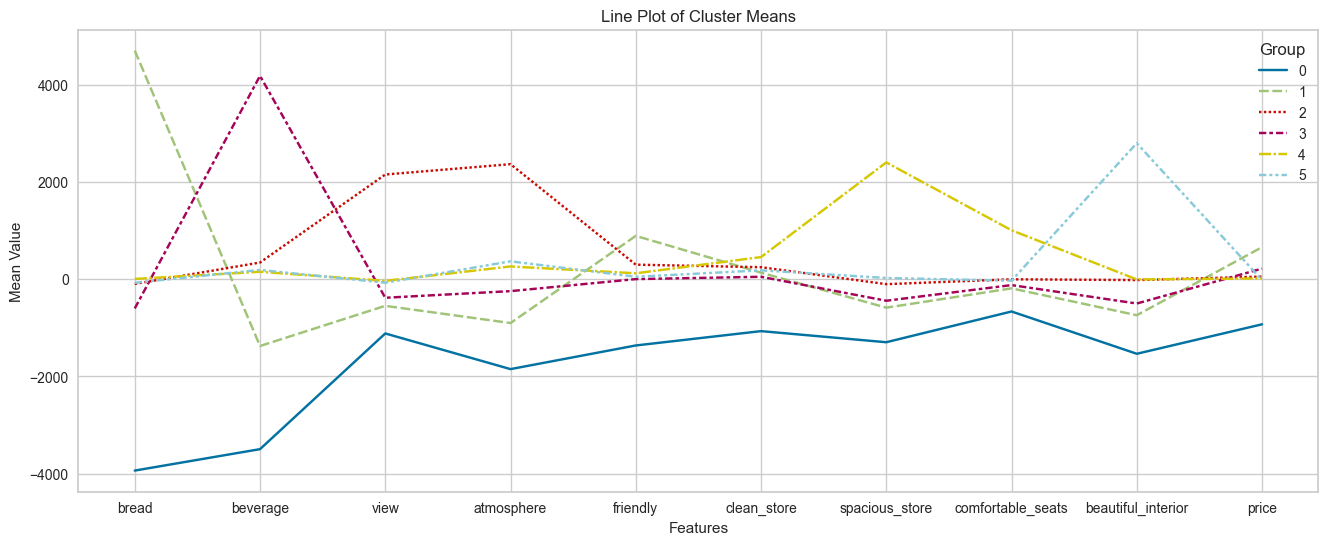

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn을 사용하여 라인 그래프 그리기
plt.figure(figsize=(16, 6))
sns.lineplot(data=cluster_means.T)
plt.title('Line Plot of Cluster Means')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Group')
plt.grid(True)
plt.show()

# 클러스터별 네이밍 태그: 딕셔너리+map()

In [49]:
df = pd.read_csv('C:\First-sean-project\streamlit_text(04.24).csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Store,cluster,cluster_labeling,Review_text,Review_score,sentiment,Address,X,Y,행정동명
0,5센소커피충무로점,0,평범해요~,여름엔 아아지!!!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
1,5센소커피충무로점,2,가성비 맛집이에요!,커피 맛있었어요~! 키오스크 주문이라 편리하고 레몬쿠키도 촉촉하니 새콤달콤 했어요~!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
2,5센소커피충무로점,0,평범해요~,처음에는 라떼가. 맛있었는데ᆢ왜맛이 변한거죠???다시 원래대로 만들어주세요,4.3,0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
3,5센소커피충무로점,0,평범해요~,아메리카노 와인 아이스 테이크아웃.더위를 날려 주는 아아,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
4,5센소커피충무로점,4,다소 비싸지만 값어치해요!,매장이 고급스럽고 깔끔해요커피도 5가지중에 고를수 있고 가격도 저렴한데 맛은 진짜 ...,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동


In [50]:
df['cluster'] = model.labels_

In [51]:
df.head()

,Store,cluster,cluster_labeling,Review_text,Review_score,sentiment,Address,X,Y,행정동명
0,5센소커피충무로점,0,평범해요~,여름엔 아아지!!!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
1,5센소커피충무로점,3,가성비 맛집이에요!,커피 맛있었어요~! 키오스크 주문이라 편리하고 레몬쿠키도 촉촉하니 새콤달콤 했어요~!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
2,5센소커피충무로점,0,평범해요~,처음에는 라떼가. 맛있었는데ᆢ왜맛이 변한거죠???다시 원래대로 만들어주세요,4.3,0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
3,5센소커피충무로점,0,평범해요~,아메리카노 와인 아이스 테이크아웃.더위를 날려 주는 아아,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
4,5센소커피충무로점,5,다소 비싸지만 값어치해요!,매장이 고급스럽고 깔끔해요커피도 5가지중에 고를수 있고 가격도 저렴한데 맛은 진짜 ...,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동


In [52]:
labeling = {0:'추천 제외 매장', 1:'소문난 빵맛집', 2: '뷰와 분위기 맛집', 3: '빵과 음료 맛집', 4: '넓고 쾌적한 매장', 5: '인테리어 맛집'}

In [53]:
df['cluster_labeling'] = df['cluster'].map(labeling)
df

,Store,cluster,cluster_labeling,Review_text,Review_score,sentiment,Address,X,Y,행정동명
0,5센소커피충무로점,0,추천 제외 매장,여름엔 아아지!!!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
1,5센소커피충무로점,3,빵과 음료 맛집,커피 맛있었어요~! 키오스크 주문이라 편리하고 레몬쿠키도 촉촉하니 새콤달콤 했어요~!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
2,5센소커피충무로점,0,추천 제외 매장,처음에는 라떼가. 맛있었는데ᆢ왜맛이 변한거죠???다시 원래대로 만들어주세요,4.3,0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
3,5센소커피충무로점,0,추천 제외 매장,아메리카노 와인 아이스 테이크아웃.더위를 날려 주는 아아,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
4,5센소커피충무로점,5,인테리어 맛집,매장이 고급스럽고 깔끔해요커피도 5가지중에 고를수 있고 가격도 저렴한데 맛은 진짜 ...,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
...,...,...,...,...,...,...,...,...,...,...
15222,황소쿠키,0,추천 제외 매장,원재료가 좋아서 쿠키 맛이 좋아요종류도 다양하고 선물용으로 좋아요^^,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15223,황소쿠키,3,빵과 음료 맛집,종류별로 다 ~~맛있어요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15224,황소쿠키,1,소문난 빵맛집,쿠키 너무 맛있고 크기대비 저렴한 편이고 사장님도 친절하시고 자주 방문하는 곳이에요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15225,황소쿠키,0,추천 제외 매장,사장님 자매가 함께 운영한다는 유기농쿠키집이랍니다. 재료가 큼직하고 진하기가 ......,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동


In [ ]:
df.to_csv('streamlit_cluster(04.24).csv', index=False)